<a href="https://colab.research.google.com/github/deepaktamil20/deepaktamil20/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/0.MKCE/Datasets/Credit Card Customer Data.xlsx')

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data = data.drop(['Sl_No','Customer Key'],axis=1)
data.shape

(660, 5)

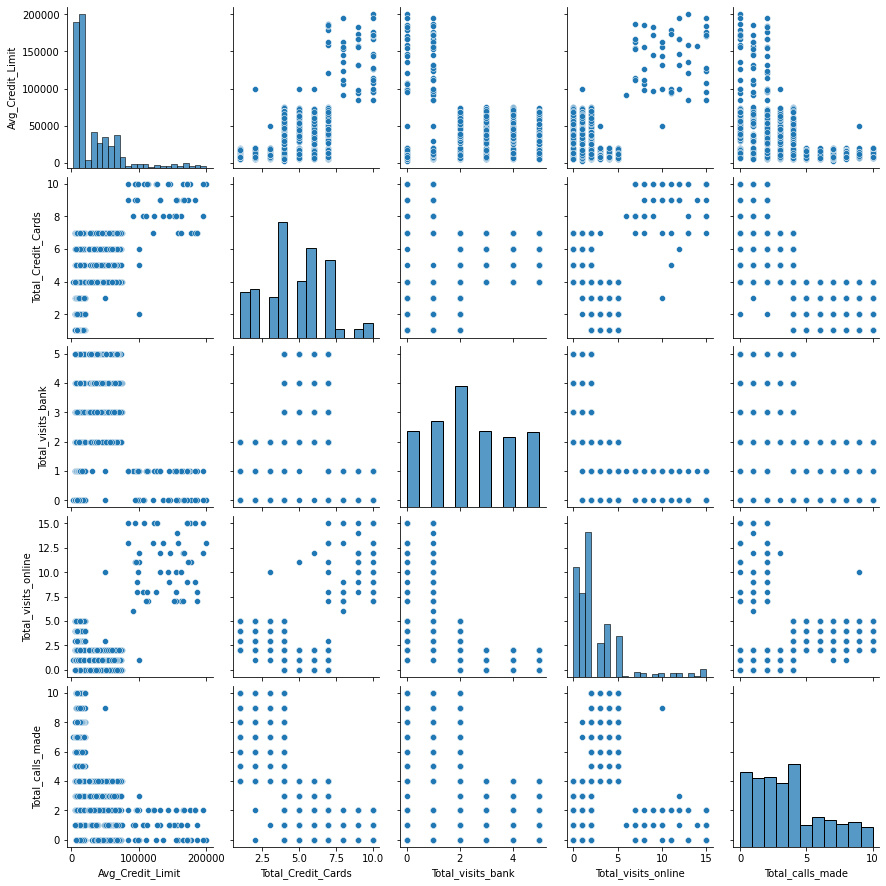

In [5]:
import seaborn as sns
sns.pairplot(data)

In [6]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


Avg_Credit_Limit has higher correlation with Total_Credit_Cards and Total_visits_online	

In [7]:
#Import machine learning library scikit learn

import sklearn

In [8]:
from sklearn.cluster import KMeans  #From big sklearn library import cluster called KMeans

In [9]:
km = KMeans(3)  #Create 3 groups

In [10]:
km.fit(data)

KMeans(n_clusters=3)

In [11]:
data['Group or Cluster'] = km.fit_predict(data)

In [12]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,1
2,50000,7,1,3,4,1
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [13]:
data['Group or Cluster'].value_counts()

0    431
1    190
2     39
Name: Group or Cluster, dtype: int64

ValueError: ignored

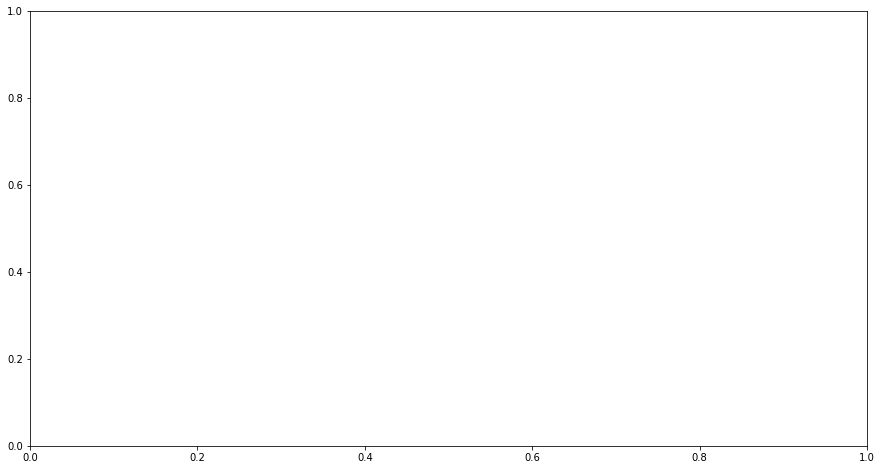

In [14]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['Total_Credit_Cards'],
                y=data['Avg_Credit_Limit'],
                hue=data['Group or Cluster'],
                palette='chroma')
plt.show()

In [15]:
wcss=[]  #With in cluster sum of squares

for i in range(1,7):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)  #Do for iterations 1 to 7 clusters, find out the min wcsss and add them

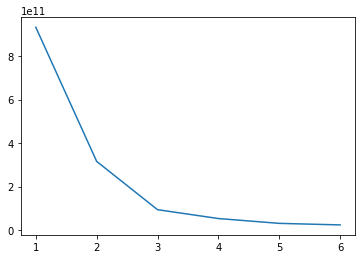

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1,7),wcss)  #Elbow Graph

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  Group or Cluster  
0                    1                 0                 2  
1                   10                 9                 2  
2                    3                 4                 2  
3                    1                 4                 0  
4                   12                 3                 2  
0    442
2    180
1     38
Name: Group or Cluster, dtype: int64


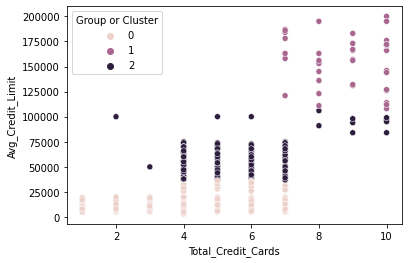

In [17]:
km = KMeans(3)
km.fit(data)
data['Group or Cluster'] = km.fit_predict(data)
print(data.head())
print(data['Group or Cluster'].value_counts())
sns.scatterplot(x=data['Total_Credit_Cards'],
                y=data['Avg_Credit_Limit'],
                hue=data['Group or Cluster'])

In [18]:
first_group = data[data['Group or Cluster']==0]

second_group=data[data['Group or Cluster']==1]

third_group = data[data['Group or Cluster']==2]

In [19]:
first_group.to_csv('first_group.csv')  #Get output file
second_group.to_csv('second_group.csv')
third_group.to_csv('third_group.csv')

In [20]:
import sklearn.metrics as metrics

In [21]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(data)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))

Silhouette score for k(clusters) = 3 is 0.7187172257825772
Silhouette score for k(clusters) = 4 is 0.6987312604482434
Silhouette score for k(clusters) = 5 is 0.7051922277856973
Silhouette score for k(clusters) = 6 is 0.5994220966946538
Silhouette score for k(clusters) = 7 is 0.6223014204276837
Silhouette score for k(clusters) = 8 is 0.6177740952516586
Silhouette score for k(clusters) = 9 is 0.6200954864571298


Max Silhouette Score as k = 3, Hence 3 Clusters is the right option

In [22]:
kmeans.labels_

array([3, 0, 0, 4, 3, 5, 3, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 5,
       1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 5, 1, 5, 5,
       1, 5, 1, 1, 1, 5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 1, 5,
       5, 1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1, 1, 1, 1,
       1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 1, 5, 1,
       1, 5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 1, 1, 1, 5, 1,
       5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 5,
       1, 1, 5, 5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5,

In [23]:
labels

array([3, 0, 0, 4, 3, 5, 3, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 5,
       1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 5, 1, 5, 5,
       1, 5, 1, 1, 1, 5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 1, 5,
       5, 1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1, 1, 1, 1,
       1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 1, 5, 1,
       1, 5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 1, 1, 1, 5, 1,
       5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 5,
       1, 1, 5, 5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5,